<a href="https://colab.research.google.com/github/Rojan116/NepaliHandWrittenAlphabetRecognizer/blob/master/augmented_cnn_predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rojan116/NepaliHandWrittenAlphabetRecognizer.git

Cloning into 'NepaliHandWrittenAlphabetRecognizer'...
remote: Enumerating objects: 92106, done.
remote: Counting objects: 100% (92106/92106), done.
remote: Compressing objects: 100% (92106/92106), done.
remote: Total 92106 (delta 16), reused 92073 (delta 0), pack-reused 0
Receiving objects: 100% (92106/92106), 56.82 MiB | 29.90 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (92012/92012), done.


In [2]:
ls

Convolutional_neural_network/         sample_data/
NepaliHandWrittenAlphabetRecognizer/


In [3]:
cd NepaliHandWrittenAlphabetRecognizer

/content/NepaliHandWrittenAlphabetRecognizer


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm
import random
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [0]:
PATH = os.getcwd()
DATADIR = PATH + '/dhrcdata/Train'		
train_data_path = PATH + '/dhrcdata/Train'
test_data_path = PATH + '/dhrcdata/Test'


In [6]:
#counting categories
new_cat = []
for x in os.listdir(train_data_path):
  new_cat.append(x)

print(new_cat)  
classes = np.unique(new_cat)
print(len(classes))


['character_27_ra', 'character_30_motosaw', 'character_22_pha', 'digit_9', 'character_24_bha', 'character_23_ba', 'character_5_kna', 'character_13_daa', 'digit_5', 'digit_0', 'character_29_waw', 'character_3_ga', 'digit_4', 'character_35_tra', 'character_21_pa', 'character_2_kha', 'character_15_adna', 'character_20_na', 'character_10_yna', 'digit_1', 'character_8_ja', 'digit_6', 'character_31_petchiryakha', 'digit_7', 'digit_3', 'character_1_ka', 'character_7_chha', 'character_14_dhaa', 'character_18_da', 'character_33_ha', 'character_32_patalosaw', 'character_25_ma', 'character_36_gya', 'character_9_jha', 'character_17_tha', 'character_6_cha', 'character_12_thaa', 'character_4_gha', 'character_11_taamatar', 'character_34_chhya', 'digit_2', 'character_28_la', 'character_26_yaw', 'character_19_dha', 'digit_8', 'character_16_tabala']
46


In [0]:
CATEGORIES = [

"character_1_ka","character_2_kha","character_3_ga","character_4_gha","character_5_kna",
"character_6_cha","character_7_chha","character_8_ja","character_9_jha","character_10_yna",
"character_11_taamatar","character_12_thaa","character_13_daa","character_14_dhaa","character_15_adna",
"character_16_tabala","character_17_tha","character_18_da","character_19_dha","character_20_na","character_21_pa",
"character_22_pha","character_23_ba","character_24_bha","character_25_ma","character_26_yaw","character_27_ra",
"character_28_la","character_29_waw","character_30_motosaw","character_31_petchiryakha","character_32_patalosaw",
"character_33_ha","character_34_chhya","character_35_tra","character_36_gya","digit_0","digit_1","digit_2","digit_3",
"digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"

]


In [0]:
IMG_SIZE = 32
training_data = []
testing_data = []

def create_training_data():
  for catagory in CATEGORIES:
    path = os.path.join(train_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array,class_num])
        except Exception as e:
          pass



def create_testing_data():
  for catagory in CATEGORIES:
    path = os.path.join(test_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          testing_data.append([new_array,class_num])
        except Exception as e:
          pass



create_training_data()
create_testing_data()


In [9]:
#shuffle training data for trainning diff image set in every batch
random.shuffle(training_data)

#hot encode image dataset

train_x = []
train_y = []
test_x = []
test_y = []



#seperating features and labels from list
for features, labels in training_data:
	train_x.append(features)
	train_y.append(labels)

for features, labels in testing_data:
	test_x.append(features)
	test_y.append(labels)


#converting list to array
train_y_array = np.array(train_y)
test_y_array = np.array(test_y)

#converting image dataset to input 32*32 dataset 

train_image_array = np.array(train_x).reshape(-1,32,32,1)
test_image_array = np.array(test_x).reshape(-1,32,32,1)

#counting total number of class in dataset
classes = np.unique(test_y_array)
print(classes)
print("total number of class={} ".format(len(classes)))



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
total number of class=46 


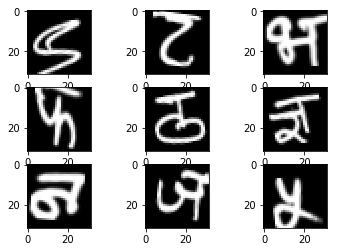

In [10]:
# convert from int to float
x_train = train_image_array.astype('float32')
x_test = test_image_array.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                              zoom_range=0.2
                            )
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, train_y, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [0]:

#one hot enoded class 
train_y = to_categorical(train_y_array)
test_y = to_categorical(test_y_array)


train_y = np.array(train_y)
test_y = np.array(test_y)

#all train x, y and test x y are in array form now


In [12]:
#new model

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(46, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=0.0001)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#model.summary()

history = model.fit(x=train_image_array,y=train_y,epochs=20,batch_size=100, validation_split=0.3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 54740 samples, validate on 23460 samples
Epoch 1/20
54740/54740 [==============================] - 13s 239us/step - loss: 5.9896 - acc: 0.0935 - val_loss: 2.3613 - val_acc: 0.4512
Epoch 2/20
54740/54740 [==============================] - 8s 147us/step - loss: 1.9949 - acc: 0.4479 - val_loss: 0.7467 - val_acc: 0.8164
Epoch 3/20
54740/54740 [==============================] - 8s 147us/step - loss: 1.0709 - acc: 0.6862 - val_loss: 0.3748 - val_acc: 0.8988
Epoch 4/20
54740/54740 [==============================] - 8s 148us/step - loss: 0.7182 - acc: 0.7865 - val_loss: 0.2560 - val_acc: 0.9297
Epoch 5/20
54740/54740 [==============================] - 8s 148us/step - loss: 0.5404 - acc: 0.8394 - val_loss: 0.2004 - val_acc: 0.9429
Epoch 6/20
54740/54740 [

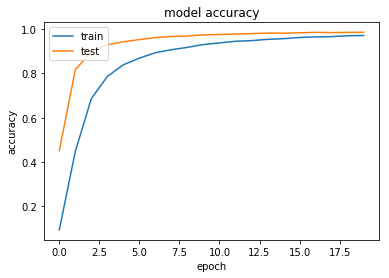

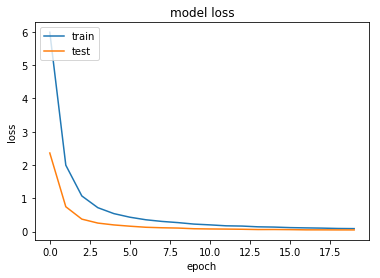

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
img = test_x[500].reshape(-1,32,32,1)
belongs_to_class = test_y[500]

In [88]:
print(img.shape)

(1, 32, 32, 1)


In [0]:
x = model.predict(img)

In [90]:
print(x)

[[1.5609588e-09 9.5359713e-01 2.0783050e-10 1.5677699e-10 6.2144622e-08
  1.4626593e-12 3.4075768e-08 4.0296739e-09 2.4571571e-09 8.8257917e-09
  3.7078902e-11 1.0557353e-11 3.7274432e-09 6.2973391e-09 6.7518519e-11
  6.8281032e-08 1.0767746e-09 3.9824286e-10 2.1119638e-10 2.6516034e-07
  3.2462447e-13 5.0293162e-11 1.9039636e-06 3.6513015e-08 3.9522025e-08
  7.1495525e-09 3.4609297e-07 1.0146335e-09 2.0428534e-08 9.7926738e-07
  3.5217468e-07 4.6333238e-02 5.5608261e-06 3.5490331e-05 1.1910258e-06
  2.3211422e-05 1.1141458e-14 7.1011766e-11 2.3160494e-11 4.0165449e-09
  3.1742526e-13 1.7141187e-10 1.3437217e-10 8.5637010e-13 5.6336782e-13
  3.4163913e-10]]


In [0]:
name = CATEGORIES[np.argmax(x)]
bc = CATEGORIES[np.argmax(belongs_to_class)]

predicted image is of: character_2_kha
Actual class label is: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


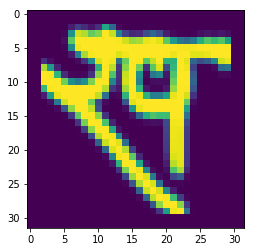

In [92]:
%matplotlib inline

print("predicted image is of: {}".format(name))
print("Actual class label is: {}".format(test_y[0]))
imgplot = plt.imshow(test_x[500])

